## Consigna 1er Parcial Computación III - Recuperatorio tema personalizado
Carrera Física Aplicada, INSPT UTN<br>
resuelto por Daiana Dominikow. Agosto 2024.

# Campo Magnético en una bobina - Método de MonteCarlo.
Volviste al pasado!. Estás parado en laboratorio 3 con una bobina cilíndrica en la mano, que tiene las siguientes características<br>

Radio de la bobina $R = 0.1m$<br>
Número de vueltas $ N = 50$<br>
Le vas a hacer pasar una corriente de $I = 2.0A$<br>

### La ley de Biot-Savart 
En el pizarrón ves que el profe dejó escrita la expresión para un elemento de corriente $d\mathbf{I}$ en un punto $\mathbf{r}'$ que contribuye a un campo magnético $d\mathbf{B}$ en un punto $\mathbf{r}$:
\begin{equation}
   d\mathbf{B} = \frac{\mu_0}{4 \pi} \frac{d\mathbf{I} \times (\mathbf{r} - \mathbf{r}')}{|\mathbf{r} - \mathbf{r}'|^3}
\end{equation}

Donde $\mathbf{r}$ es la posición del punto donde se mide el campo magnético y $\mathbf{r}'$ es la posición del elemento de corriente.<br>

Consideremos una bobina circular de radio $R$ en el plano $xy$ con corriente $I$. Queremos calcular el campo magnético en el centro de la bobina usando la ley de Biot-Savart.

La ley de Biot-Savart nos dice que el campo magnético diferencial $d\mathbf{B}$ en un punto $\mathbf{r}$ debido a un elemento diferencial de corriente $d\mathbf{I}$ en una posición $\mathbf{r}'$ está dado por:

$$
d\mathbf{B} = \frac{\mu_0}{4 \pi} \frac{d\mathbf{I} \times (\mathbf{r} - \mathbf{r}')}{|\mathbf{r} - \mathbf{r}'|^3}
$$


El elemento diferencial de corriente $d\mathbf{I}$ en la bobina está en la posición:

$$
\mathbf{r}' = (R \cos \theta, R \sin \theta, 0)
$$

El elemento diferencial de corriente es:

$$
d\mathbf{I} = I \, d\mathbf{l}
$$

donde $d\mathbf{l}$ es el vector diferencial de longitud tangencial en la bobina:

$$
d\mathbf{l} = R \, d\theta \, (-\sin \theta, \cos \theta, 0)
$$


El vector de diferencia $\mathbf{r} - \mathbf{r}'$ desde el elemento de corriente al punto donde medimos el campo magnético (el centro de la bobina en $(0, 0, 0)$) es:

$$
\mathbf{r} - \mathbf{r}' = (0, 0, z) - (R \cos \theta, R \sin \theta, 0) = (-R \cos \theta, -R \sin \theta, z)
$$

La magnitud de este vector es:

$$
|\mathbf{r} - \mathbf{r}'| = \sqrt{(-R \cos \theta)^2 + (-R \sin \theta)^2 + z^2} = \sqrt{R^2 + z^2}
$$

 
$$
d\mathbf{I} \times (\mathbf{r} - \mathbf{r}') = I \, R \, d\theta \left[ R z \sin \theta \mathbf{j} + R \mathbf{k} \right]
$$


La componente \( z \) del campo magnético diferencial \( dB_z \) en el centro de la bobina (ya que \( dB_x \) y \( dB_y \) se cancelan por simetría) es:

$$
dB_z = \frac{\mu_0}{4 \pi} \frac{d\mathbf{I} \times (\mathbf{r} - \mathbf{r}') \cdot \mathbf{k}}{|\mathbf{r} - \mathbf{r}'|^3}
$$

$$
dB_z = \frac{\mu_0}{4 \pi} \frac{I \, R \, d\theta \cdot R}{(R^2 + z^2)^{3/2}}
$$

$$
dB_z = \frac{\mu_0 I R^2 d\theta}{4 \pi (R^2 + z^2)^{3/2}}
$$


Integramos \( dB_z \) sobre todo el ángulo \( \theta \) de \( 0 \) a \( 2 \pi \):

$$
B_z = \int_0^{2 \pi} \frac{\mu_0 I R^2 d\theta}{4 \pi (R^2 + z^2)^{3/2}}
$$

$$
B_z = \frac{\mu_0 I R^2}{4 \pi (R^2 + z^2)^{3/2}} \cdot 2 \pi
$$

$$
B_z = \frac{\mu_0 I R^2}{2 (R^2 + z^2)^{3/2}}
$$

Este es el campo magnético en el centro de la bobina debido a la corriente en una espira. Para una bobina con \( N \) espiras, el campo total se multiplica por \( N \):

$$
B = \frac{\mu_0 N I R^2}{2 (R^2 + z^2)^{3/2}}
$$

Cuando \( z = 0 \) (en el centro de la bobina), la fórmula se simplifica a:

$$
B = \frac{\mu_0 N I}{2 R}
$$


## Consigna exámen
Ahora, aclarada la teoría la consigna consta de calcular el campo magnético en el centro de la bobina utilizando el método de Montecarlo. Para ello, se sugiere que realices los siguientes pasos:<br>

* Definí tus constantes<br>

* Genera un conjunto de puntos aleatorios en el plano $z=0$ dentro de un cuadrado que abarque el área de la bobina, es decir, dentro del intervalo $ [−0.1 , 0.1] $ para ambas coordenadas $x$ e $y$. Andá probando como te vá dando con diferentes cantidades. <br>

* Calculá el campo magnético en cada uno de los puntos generados usando la fórmula aproximada para el campo magnético en el centro de una bobina cilíndrica. En criollo, definite una función campo magnético que devuelva el valor para cada punto que caiga dentro de la bobina. <br>
Para cada uno de los puntos que caigan dentro de la bobina entonces

\begin{equation}
dB = \frac{\mu_0 I R^2}{2n (R^2 + \sqrt{(x^2+ y^2)})^{3/2}}
\end{equation}   

Donde $n$ es la cantidad de iteraciones y   $\mu_0$ es la permeabilidad del vacío <br>

\begin{equation}
\mu_0 = 4 \pi \times 10^{-7} \, \text{T} \cdot \text{m/A}
\end{equation}

* Promedia los valores del campo magnético para los puntos generados para obtener una estimación del campo magnético en el centro de la bobina.<br>

* Comenta sobre la precisión del método utilizado y qué aspectos podrían mejorar la estimación del campo magnético.



Campo magnético analíticamente en el centro de la bobina: B = 0.000628 T
Campo magnético en el centro de la bobina MC: B = 0.000369 T


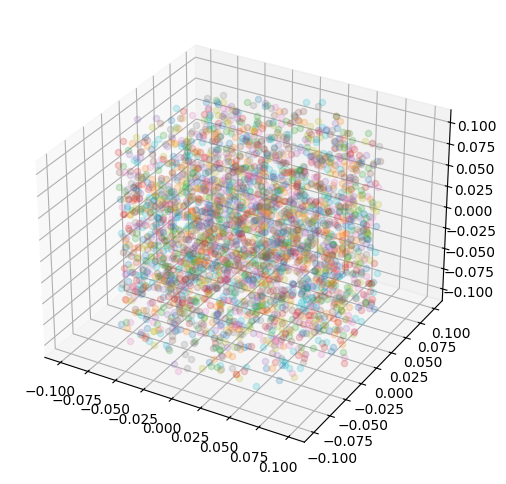

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')


# Parámetros de la bobina
R = 0.1  # Radio de la bobina en metros
N = 50   # Número de vueltas
I = 2.0  # Corriente en amperios

# Número de puntos aleatorios
n = 3000
i = 0

# Permeabilidad del vacío
mu0 = 4 * np.pi * 1e-7  

B = 0

# Creo mi función 'campo magnético'
def campo_magnetico(R,x,y, N,I):
    # Fórmula aproximada para el campo magnético dentro de una bobina circular
    r = np.sqrt(x**2 + y**2)
    dB = (N*  mu0 * I * R**2) / (2 * (R**2 + (r**2))**(3/2))
    return dB/n


while i < n:    
    x = R *(np.random.random() * 2 - 1)
    y = R *(np.random.random() * 2 - 1)
    z = R *(np.random.random() * 2 - 1)
    
    if np.sqrt(x**2 + y**2) <= R  :
        B += campo_magnetico(R,x,y, N,I) 
        i +=1
        ax.scatter(x,y,z, alpha=0.2)

        
B_exact =  N* (mu0 *  I) / (2 * R)
print(f"Campo magnético analíticamente en el centro de la bobina: B = {B_exact :.6f} T")
print(f"Campo magnético en el centro de la bobina MC: B = {B :.6f} T")